In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_regression

In [4]:
x,y = make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [5]:
x

array([[-0.64075978, -0.21391766],
       [-1.0698589 , -0.99256748],
       [-0.19347789,  0.12872454],
       ...,
       [ 1.11224722,  0.06824963],
       [ 1.08487867,  1.25037063],
       [ 0.71862955,  0.04067088]], shape=(1000, 2))

<Axes: xlabel='0', ylabel='1'>

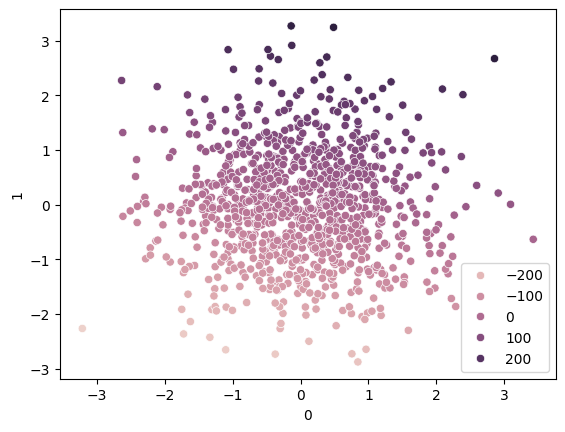

In [7]:
sns.scatterplot(x=pd.DataFrame(x)[0],y=pd.DataFrame(x)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [10]:
from sklearn.svm import SVR

In [11]:
svr = SVR(kernel='linear')

In [12]:
svr.fit(x_train,y_train)

SVR(kernel='linear')

In [13]:
svr.coef_

array([[21.59695468, 84.88129206]])

In [14]:
y_pred = svr.predict(x_test)

In [16]:
from sklearn.metrics import accuracy_score,classification_report,r2_score

In [19]:
r2_score(y_test,y_pred)

0.9987504179021468

# Hyperparameter Tuning With SVC

In [20]:
from sklearn.model_selection import GridSearchCV

In [25]:
parameter = {
    'C' : [0.1,1,10,100,1000],
    'gamma' : [1,0.1,0.01,0.001,0.0001],
    'kernel' : ['linear'],
    'epsilon' :[0.1,0.2,0.3] 
}

In [26]:
grid = GridSearchCV(SVR(),param_grid=parameter,refit=True,cv=5,verbose=3)

In [27]:
grid.fit(x_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.773 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.784 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.767 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.773 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.780 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.785 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [28]:
grid.best_params_

{'C': 1000, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [29]:
#prediction
y_pred1 = grid.predict(x_test)

In [30]:
r2_score(y_test,y_pred1)

0.9987855494412483